# Perceptron
The perceptron, developed by Frank Rosenblatt in 1957, is a basic type of artificial neuron and the simplest form of a neural network. It functions by taking multiple binary inputs, each weighted, and sums them to produce a single binary output. The output is determined by whether the weighted sum exceeds a certain threshold, using a step function. Despite its foundational role in neural network theory, perceptrons are limited as they cannot solve problems that are not linearly separable, leading to the development of more complex networks.

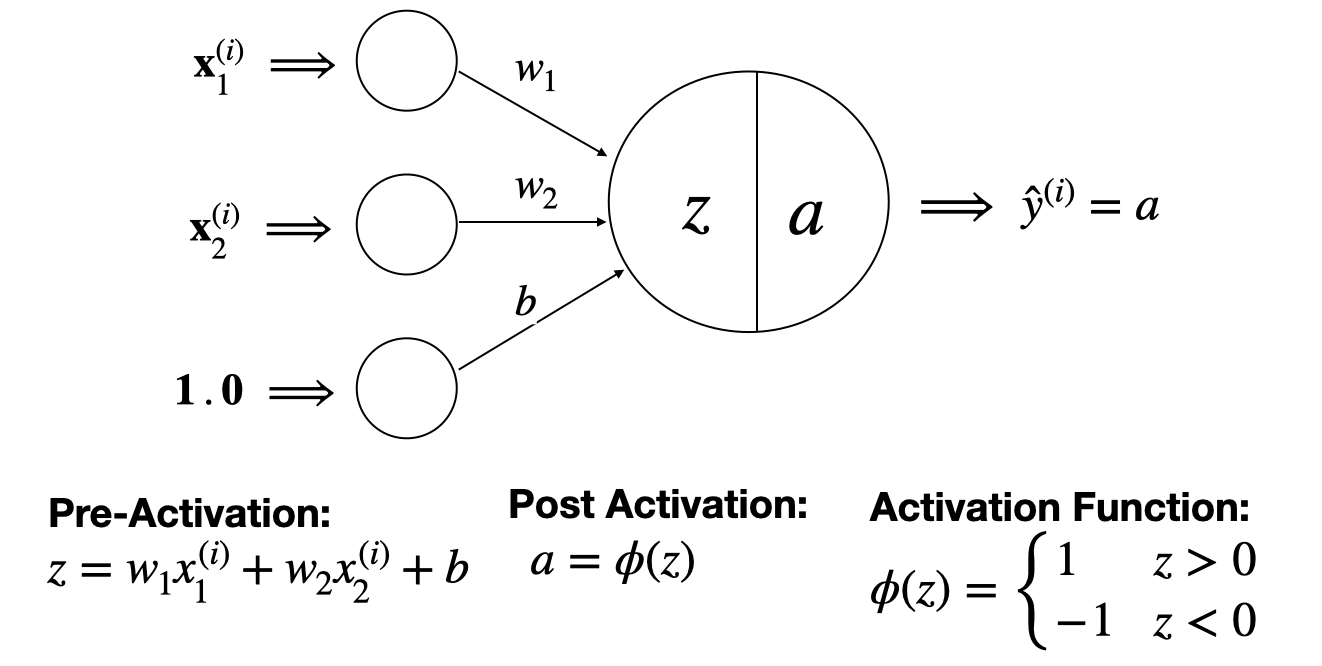

## Algorithm
We will build the above algorithm from scratch:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

class Perceptron(object):
        """
    This class implements the Perceptron algorithm for binary classification.

    The Perceptron is a type of linear classifier that uses a linear predictor function 
    to make its predictions. It's particularly useful for simple binary classification tasks.

    Attributes:
        learning_rate (float): The step size at each iteration while moving toward a minimum of the loss function.
        n_iterations (int): The number of passes over the training data (also known as epochs).
        weights (numpy.ndarray): The weights assigned to the features.
        bias (float): The bias term, added to the linear sum.
        errors_ (list): A list that records the total number of misclassifications (updates) in each epoch.

    Methods:
        fit(X, y): Fit the model to the training data.
        predict(X): Predict class labels for samples in X.
        activation_function(x): Apply the step function to get the binary output.

    Parameters:
        X (array-like): Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y (array-like): Target values (binary).

    Example:
        >>> import numpy as np
        >>> X = np.array([[1, 2], [3, 4], [5, 6]])
        >>> y = np.array([0, 1, 0])
        >>> clf = Perceptron(learning_rate=0.01, n_iterations=1000)
        >>> clf.fit(X, y)
        >>> print(clf.predict([[1, 2]]))
        [0]
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors_=[]

        # Gradient descent
        for _ in range(self.n_iterations):
            errors=0
            for x_i,y_i in zip(X,y):
                linears_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linears_output)
                # Perceptron update rule
                update = self.learning_rate * (y_predicted - y_i)
                self.weights -= update * x_i
                self.bias -= update
                errors+=update
            self.errors_.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)


## Data application
In this analysis, we used a dataset that is publicly available on Kaggle, originally collected and provided by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, part of the Long Term Ecological Research Network. For our study, we selected 'Sex' as the dependent variable (y) and two features: 'culmen_length_mm' and 'culmen_depth_mm'.
We can view the errors over each epoch by running the following code in the cell below. 

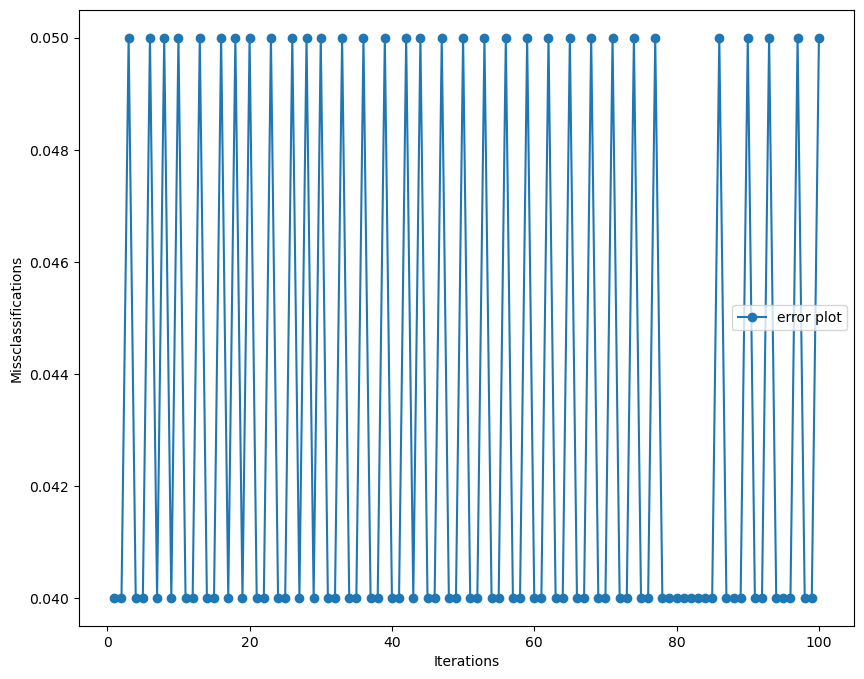

In [128]:
clf = Perceptron(n_iterations=100)
clf.fit(X,y)
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

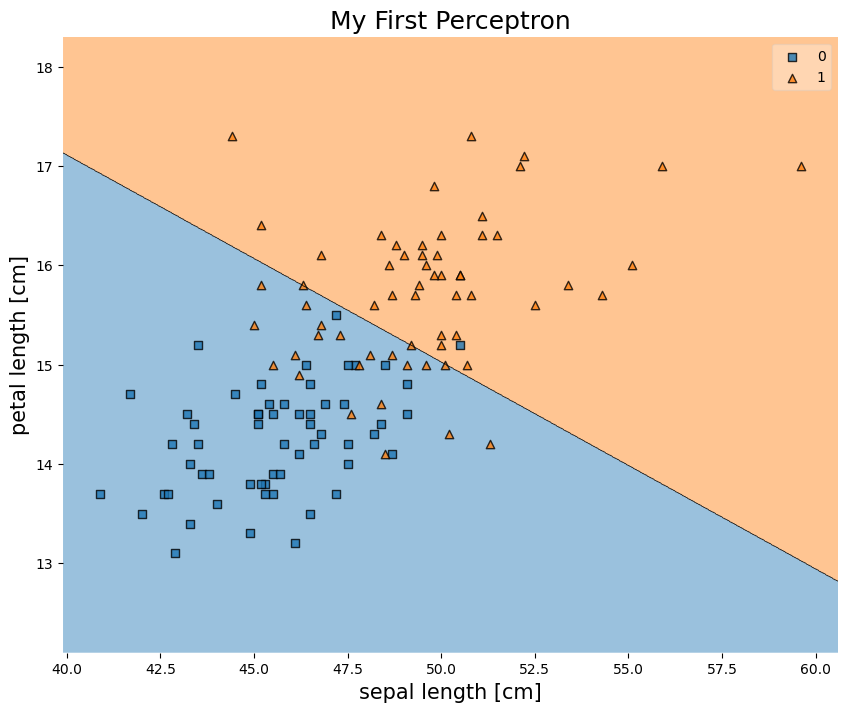

In [130]:
X_array = np.array(X)
y_array = np.array(y)
clf = Perceptron(n_iterations=100000)
clf.fit(X,y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X_array, y_array, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.show()

As we can see from the output of the code above, we have found a nice linear seperator which has classified our data. 

## Limitation
One of the most significant limitations of a perceptron is its inability to solve problems that are not linearly separable, such as the XOR problem. This limitation led to the first AI winter but also paved the way for the development of more complex neural network models.

## Conclusion
In conclusion, while the perceptron as a standalone model has significant limitations and is not used for practical applications in modern AI, its development marked a pivotal moment in the history of neural networks and machine learning. It laid the groundwork for the evolution of more complex and capable models, making it a fundamental concept in the field of AI.